Using andas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on a random website from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
  - The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". 
  - The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
- Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
    - It should show average daily page views for each month grouped by year.
    - The legend should show month labels and have a title of "Months".
    - On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
- Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
    - These box plots should show how the values are distributed within a given year or month and how it compares over time.
    - The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". 
    - Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [21]:
df=pd.read_csv("data/fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")
df.head(5)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [22]:
df.shape

(1304, 1)

In [23]:
#clean data
df=df[
    (df["value"]>= df["value"].quantile(0.025)) & 
    (df["value"]<= df["value"].quantile(0.975))]

df.shape

(1238, 1)

Text(0, 0.5, 'Page Views')

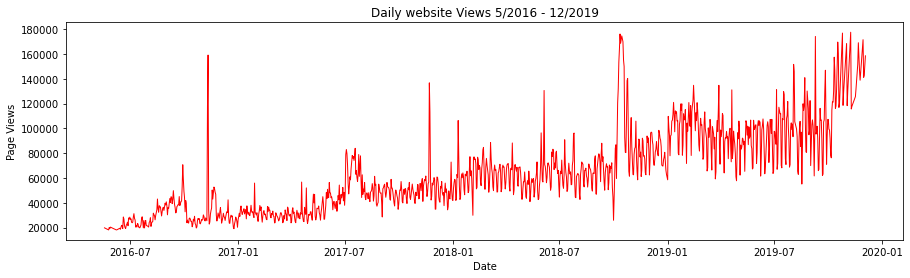

In [24]:
#draw line plot
fig,ax= plt.subplots(figsize= (15,4))
ax.plot(df.index, df["value"], "r", linewidth=1)

ax.set_title("Daily website Views 5/2016 - 12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

#fig.savefig ("line_plot.png")

In [48]:
#bar plot
df["month"] = df.index.month
df["year"] = df.index.year


df_bar=df.groupby(["year", "month"])["value"].mean()
df_bar=df_bar.unstack()
df_bar.columns = ["January","February","March","April","May","June","July","August","September","October","November","December"]
#.unstack() -- Returns a df having a new level of column labels whose inner-most level consists of the pivoted index labels.

<AxesSubplot:xlabel='year'>

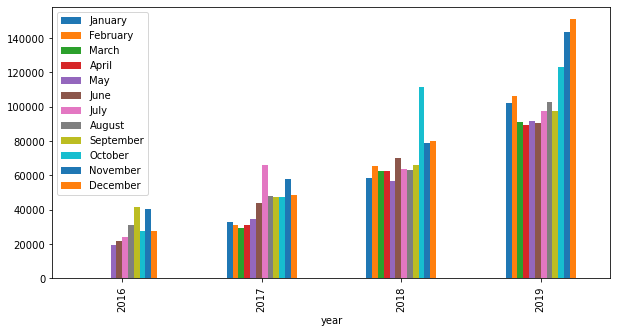

In [51]:
#fig,ax = df_bar.plot.bar(legend=True, figsize = (10,5), ylabel= "Average Page Views").figure
fig=df_bar.plot.bar(legend= True, figsize =(10,5))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#fig.savefig ("bar_plot.png")